# Advanced Statistical Methods for Physicists
# Exam 14.06.2013 - Immanuel Albrecht

## Exercise 1 (20/30 pts) – Brightening star

In [1]:
library(rethinking)
data <- read.csv(file="brightening_star.csv", header=TRUE, sep=";")

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders




rstan version 2.26.20 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: C:/Users/immal/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)


Attache Paket: 'rethinking'


Das folgende Objekt ist maskie

---

The flux of a star has been found to increase abruptly recently. No less than 26 observatories have performed measurements of this star at the same, 9 epochs (dates that have been standardised in the file). All these measurements have been compiled in the file brightening_star.csv mentioned above. One issue is that each observatory, run by different teams and using different data analysis methods are affected by systematics effects and the measured values differ by a lot. Using a multi-level model will thus be useful to make accurate inference.

The science question is: what is the dependence of star flux on time?

---

We start by looking at our dataset.

Observatory,Epoch,Flux,Measurement
<int>,<dbl>,<dbl>,<int>
1,-1.0000,140.5,1
1,-0.7479,143.4,2
1,-0.4630,144.8,3
1,-0.1643,147.1,4
1,-0.0027,147.7,5
1,0.2466,150.2,6
1,0.5562,151.7,7
1,0.7781,153.3,8
1,0.9945,155.8,9


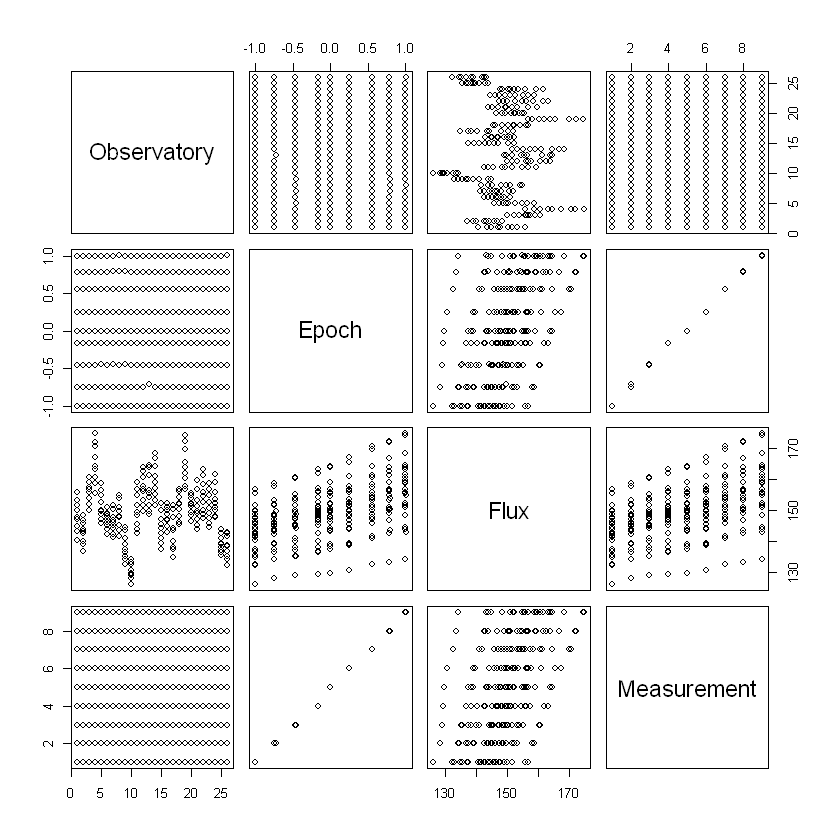

In [2]:
data
pairs(data)

In [13]:
# We build our data for the model
d <- data.frame(list(flux = data$Flux, time = data$Epoch, obs = data$Observatory, measurement = data$Measurement))
# Standardize the flux
d$flux <- scale(d$flux)
d

flux,time,obs,measurement
"<dbl[,1]>",<dbl>,<int>,<int>
-0.99079357,-1.0000,1,1
-0.67222462,-0.7479,1,2
-0.51843271,-0.4630,1,3
-0.26577457,-0.1643,1,4
-0.19986376,-0.0027,1,5
0.07476465,0.2466,1,6
0.23954169,0.5562,1,7
0.41530387,0.7781,1,8
0.68993228,0.9945,1,9


The next step ist to build the multi-level model.

1. Which would be the obvious cluster to use?

In this case the obvious clusters are the observatories, and thats what we are going to use.

2. Design two multi-level models to address the question above, one with varying intercepts alone and one with both varying intercepts and varying slopes.

In [4]:
# A model with varying intercepts
intercepts <- map2stan(
    alist(
        flux <- dnorm(mu, sigma),
        mu <- a[obs],
        a[obs] ~ dnorm(a_pool, 10),
        a_pool ~ dnorm(0, 10),
        sigma ~ dcauchy(0, 10)
    ),
    data = d,
    constraints = list(simga = "lower=0"),
    chains = 7, cores = 7
)

Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs], a[obs] ~ :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs], a[obs] ~ :
"Stripping scale attributes from variable flux"


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpaSqGVm/model-3dd8594e54b8.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpaSqGVm/model-3dd8594e54b8.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2

Computing WAIC



In [4]:
# A model with varying intercepts and varying slopes
slopes <- map2stan(
    alist(
        flux <- dnorm(mu, sigma),
        mu <- a[obs] + b_time[obs] * time,
        a[obs] ~ dnorm(a_pool, 10),
        a_pool ~ dnorm(0, 10),
        b_time[obs] ~ dnorm(b_time_pool, 10),
        b_time_pool ~ dnorm(0, 10),
        sigma ~ dcauchy(0, 10)
    ),
    data = d,
    constraints = list(simga = "lower=0"),
    chains = 7, cores = 7
)

Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs] + b_time[obs] * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs] + b_time[obs] * :
"Stripping scale attributes from variable flux"


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1d242225.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1d242225.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1d242225.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 200

Computing WAIC



3. Run both models, present the results in the form that you find the most relevant and interpret the estimates. What is the largest source (intercept/slope?) of variation in the outcome?

In [6]:
compare(intercepts, slopes)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
slopes,-502.8295,23.74248,0.0000,NA,49.74929,1.000000e+00
intercepts,379.5735,16.90505,882.4029,24.79406,25.03757,2.447005e-192


The model with the slopes has a way better WAIC than the model with only the intercepts, we may as well discard the intercepts model.

4. Build a third model that includes the correlation between the varying intercepts and slopes. Interpret the value of the correlation and discuss the implication on the predictions that you could make, if you were to receive a sample of new observations for that star.

In [31]:
# A model with varying intercepts and varying slopes,
# that takes the correlation between slopes and intercepts into account
slopes_cov <- ulam(
    alist(
        flux <- dnorm(mu, sigma),
        mu <- a[obs] + b_time[obs] * time,
        c(a, b_time)[obs] ~ multi_normal(c(a_pool, b_time_pool), Rho, sigma_pool),
        a_pool ~ dnorm(0, 10),
        b_time_pool ~ dnorm(0, 10),
        sigma_pool ~ dcauchy(0, 10),
        sigma ~ dcauchy(0, 10),
        Rho ~ lkj_corr(2)
    ),
    data = d,
    constraints = list(simga = "lower=0"),
    chains = 7, cores = 7, log_lik = TRUE
)

Semantic error in 'C:/Users/immal/AppData/Local/Temp/RtmpaSqGVm/model-3dd84096307f.stan', line 34, column 18 to column 37:
   -------------------------------------------------
    32:      }
    33:      for ( i in 1:234 ) {
    34:          flux[i] = dnorm(mu[i], sigma);
                           ^
    35:      }
    36:  }
   -------------------------------------------------

A returning function was expected but an undeclared identifier 'dnorm' was supplied.
A similar known identifier is 'norm'


mingw32-make: *** [make/program:50: C:\Users\immal\AppData\Local\Temp\RtmpaSqGVm\model-3dd84096307f.hpp] Error 1




ERROR: Error: An error occured during compilation! See the message above for more information.


In [20]:
# A model with varying intercepts and varying slopes,
# that takes the correlation between slopes and intercepts into account
slopes_cov <- map2stan(
    alist(
        flux <- dnorm(mu, sigma),
        mu <- a[obs] + b_time[obs] * time,
        c(a, b_time)[obs] ~ dmvnorm2(c(a_pool, b_pool), sigma_pool, Rho),
        a_pool ~ dnorm(0, 10),
        b_time_pool ~ dnorm(0, 10),
        sigma_pool ~ dcauchy(0, 10),
        sigma ~ dcauchy(0, 10),
        Rho ~ dlkjcorr(2)
    ),
    data = d,
    constraints = list(simga = "lower=0"),
    chains = 7, cores = 7
)

Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs] + b_time[obs] * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(flux <- dnorm(mu, sigma), mu <- a[obs] + b_time[obs] * :
"Stripping scale attributes from variable flux"


ERROR: Error in if (class(start[[1]][[i]]) == "matrix") {: Bedingung hat Länge > 1


Sadly, I was not able to fix the issue with the correlation approach for the code for now. I will use the data from the previous model to continue the exercise.

5. Using the posterior mean values of the parameters, simulate flux data from 5 new observatories. Simulating both the varying slopes and intercepts will be necessary.

In [8]:
# Extracting the posterior distribution
post <- extract.samples(slopes)

The data for the intercepts of new observatories is given in `a_pool`, and for the slopes we find it in `b_time_pool`.

In [18]:
post_a_pool <- mean(post$a_pool)
post_b_time_pool <- mean(post$b_time_pool)
post_sigma <- mean(post$sigma)

We then draw 5 times from the given distributions in order to get 5 new `a[obs]` and `b_time[obs]` for 5 new observatories.

In [39]:
# Simulating the intercepts
post_a <- rnorm(5, post_a_pool, 10)
# Simulating the slopes
post_b_time <- rnorm(5, post_b_time_pool, 10)

Building the flux simulation is straight forward. We use the same epoch data for our time sequence as given in the dataset.

In [41]:
# Defining the measurement epochs
seq <- d$time[1:9]
# Indexing the new observations
indices <- c(1, 2, 3, 4, 5)
# Creating arrays for the new data
new_flux <- c()
new_time <- c()
new_obs <- c()
new_measurement <- c()


for (index in indices) for (step in 1:9) {
    time <- seq[step]
    # Link function to generate mu from a and b_time * time
    mu_link <- function(time) post_a[index] + post_b_time[index] * time
    mu <- mu_link(time)
    flux <- rnorm(1, mu, post$sigma)
    new_flux <- append(new_flux, flux)
    new_time <- append(new_time, time)
    new_obs <- append(new_obs, 26 + index)
    new_measurement <- append(new_measurement, step)
}

sim_data <- data.frame(list(flux = new_flux,
    time = new_time,
    obs = new_obs,
    measurement = new_measurement
))
sim_data

flux,time,obs,measurement
<dbl>,<dbl>,<dbl>,<int>
-0.1787919,-1.0000,27,1
-1.5307202,-0.7479,27,2
-2.6329597,-0.4630,27,3
-4.0038512,-0.1643,27,4
-4.7851096,-0.0027,27,5
-6.1310848,0.2466,27,6
-7.4477588,0.5562,27,7
-8.5205116,0.7781,27,8
-9.6333499,0.9945,27,9


---

## Exercise 2 (10/30 pts) – Dysfunctional cosmic ray detectors

In [44]:
library(rethinking)
data2 <- read.csv(file="detectors.csv", header=TRUE, sep=";")

The dataset is about a campaign of 250 distinct experiments to detect cosmic rays (CR) around the globe. Each detector has different properties (e.g. old/new generation, number of arrays...). One issue is that we do not know whether each experiment was actually functioning when it was powered up. For each experiment, the dataset includes the number of CR that have been detected, whether the detector used was equipped with an amplifier to increase sensitivity, whether it used a next-generation detector, how many arrays each detector had and how many of these arrays were operating in parallel. Finally the timespan during which the experiment was powered-up is indicated in the final column. The scientific question is how many cosmic rays are detected per hour per detector array, when the experiment is actually functioning.

1. Think about the data-generating process. Write down one possible likelihood to answer the science question.

In [45]:
summary(data2)

   Experiment       CRdetected        Amplifier.      Next.gen.    
 Min.   :  1.00   Min.   :  0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 63.25   1st Qu.:  0.000   1st Qu.:1.000   1st Qu.:0.000  
 Median :125.50   Median :  0.000   Median :1.000   Median :1.000  
 Mean   :125.50   Mean   :  3.296   Mean   :0.864   Mean   :0.588  
 3rd Qu.:187.75   3rd Qu.:  2.000   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :250.00   Max.   :149.000   Max.   :1.000   Max.   :1.000  
   Detarrays     Parallelarrays  Powered.on.time..hours.
 Min.   :1.000   Min.   :0.000   Min.   : 0.0040        
 1st Qu.:2.000   1st Qu.:0.000   1st Qu.: 0.2865        
 Median :2.000   Median :0.000   Median : 1.8315        
 Mean   :2.528   Mean   :0.684   Mean   : 5.5260        
 3rd Qu.:4.000   3rd Qu.:1.000   3rd Qu.: 7.3427        
 Max.   :4.000   Max.   :3.000   Max.   :71.0360        

For each functioning detector array, the detection would be a Poisson process with some rate of events. So the measured cosmic rays would be proportional to the measured time and the number of arrays that were active at the same time. The number of arrays itself does not play a role if they were not active in parallel. Maybe the fact if the experiment had an amplifier or if it was next gen does have an impact on the data, but this would need to be identified in the analysis.

2. Design a model to predict the number of detected CRs per detector array per second as a function of any variables that are found to be relevant, you can try several and use model comparison to identify those that are worth including.

As said above, we model the detection in a Poisson process, dependent on the amount of time passed times the detectors amount. We thus build a dataset that includes the detectortime.

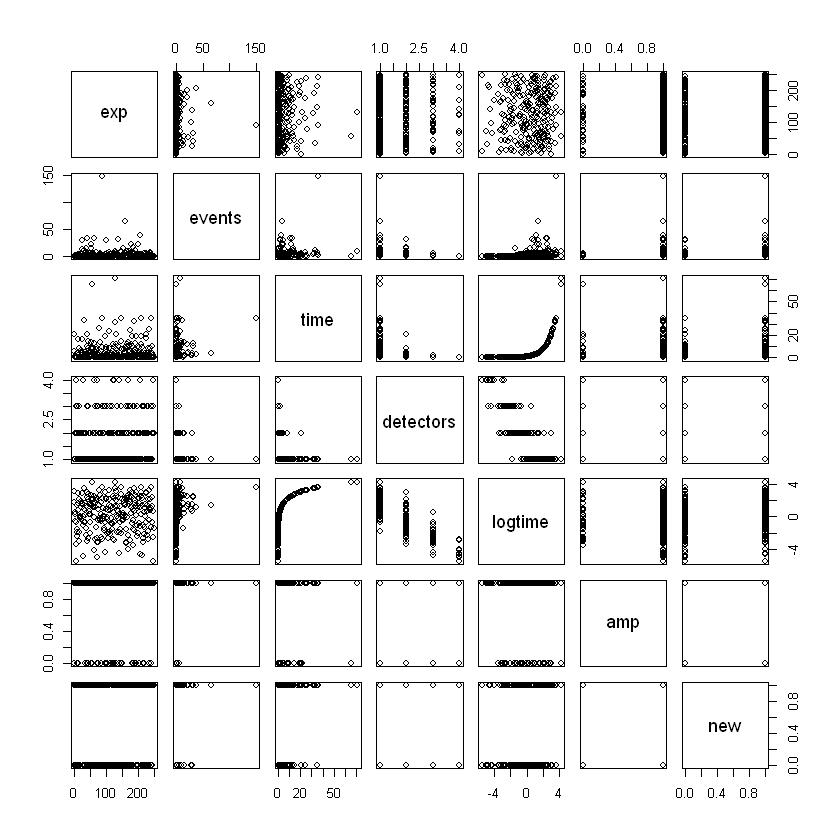

In [48]:
d <- data.frame(list(
    exp = data2$Experiment,
    events = data2$CRdetected,
    time = data2$Powered.on.time..hours.,
    detectors = data2$Parallelarrays + 1
))
d$logtime = log(d$time)
d$amp <- data2$Amplifier.
d$new <- data2$Next.gen.
pairs(d)

In the pairs plot we see that the events ~ time plot has a lot of data in short time spans and few datapoints for big time spans. Thus it is helpful to use a logartihmic scale for the time.

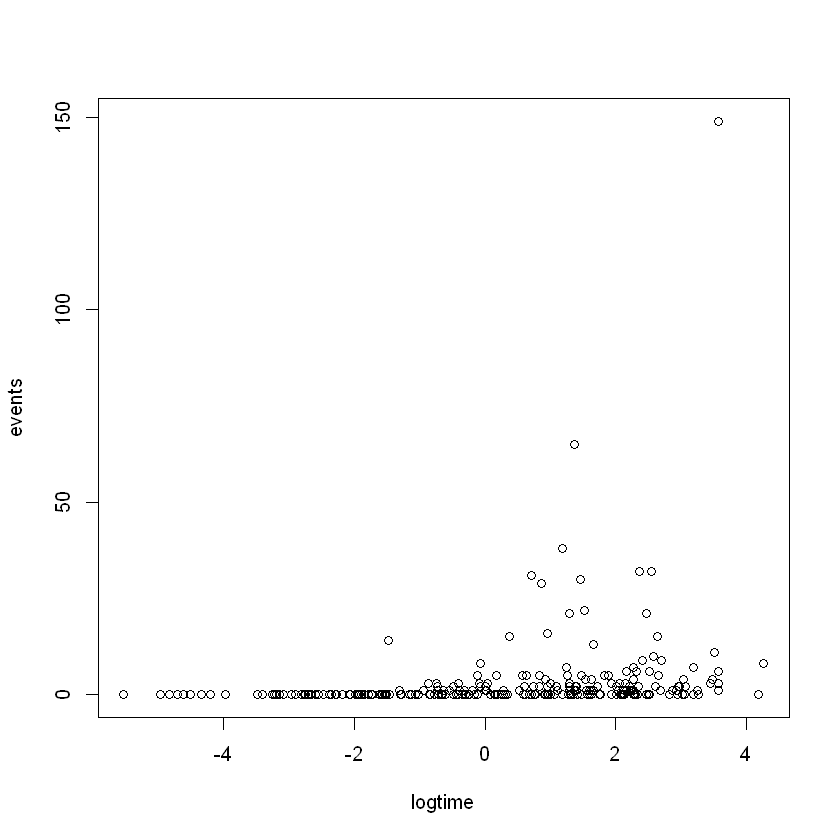

In [49]:
plot(events ~ logtime, data = d)

We start by building a single intercept model with slope.

In [50]:
# Linear model
model <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc53bf1c23.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc53bf1c23.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 200

Computing WAIC



[ 1000 / 1000 ]
[ 1000 / 1000 ]


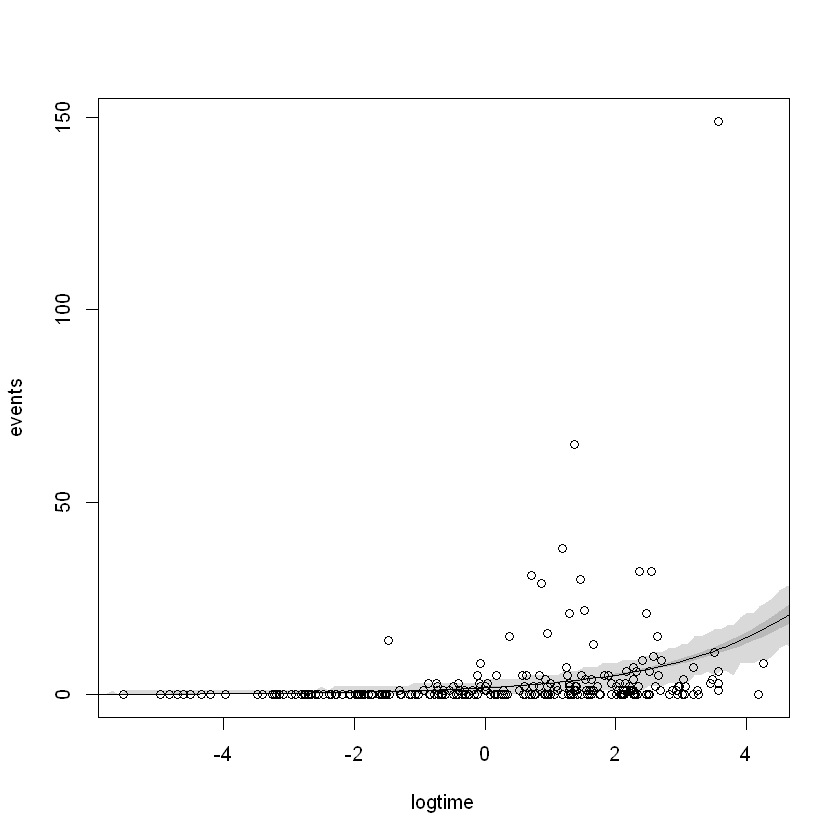

In [51]:
seq <- seq(from = -6, to = 5, by = 0.1)

mu <- link(model, data = list(logtime = seq))
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(events ~ logtime, data = d)
lines(seq, mu_mean)
shade(mu_HPDI, seq)

sim_data <- sim(model, data = list(logtime = seq))
sim_HPDI <- apply(sim_data, 2, HPDI, prob = 0.91)
shade(sim_HPDI, seq)

We see that a Poisson glm with a linear dependence on time has a big overdispersion. Lets consider some more models with different predictors.

In [52]:
# Linear model with an additional intercept if the experiment has an amplifier
model_amp <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_amp * amp,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_amp ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc63e76aa3.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc63e76aa3.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc63e76aa3.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 200

Computing WAIC



In [53]:
# Linear model with an additional intercept if the experiment is new
model_new <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_new * new,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_new ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1fa72eea.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1fa72eea.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc1fa72eea.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 200

Computing WAIC



In [54]:
# Linear model with an additional intercept for both next gen and amplifier
model_amp_new <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_new * new + a_amp * amp,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_new ~ dnorm(0, 10),
        a_amp ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc70df623c.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc70df623c.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc70df623c.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  100 / 200

Computing WAIC



In [55]:
compare(model, model_amp, model_new, model_amp_new)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_amp,2609.015,596.3442,0.00000,NA,77.99528,8.649019e-01
model_amp_new,2612.728,598.5268,3.71323,41.93020,93.78517,1.350981e-01
model_new,2736.632,639.4505,127.61748,78.83329,86.62246,1.679509e-28
model,2759.378,652.9236,150.36296,76.27818,78.50924,1.932258e-33


One predictor that we havent yet included is the number of parallel detectors, which, as discussed above, might be as important as the running time itself. We include it linearly into the four models above.

In [56]:
# Linear model with numbers of detectors
model_detectors <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + b_detectors * detectors,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        b_detectors ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffcbf25658.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffcbf25658.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffcbf25658.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 200

Computing WAIC



In [57]:
# Linear model with an additional intercept if the experiment has an amplifier
model_amp_detectors <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_amp * amp + b_detectors * detectors,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_amp ~ dnorm(0, 10),
        b_detectors ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc4b50c2f.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc4b50c2f.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc4b50c2f.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 200

Computing WAIC



In [58]:
# Linear model with detectors with an additional intercept if the experiment is new
model_new_detectors <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_new * new + b_detectors * detectors,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_new ~ dnorm(0, 10),
        b_detectors ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc2849128e.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc2849128e.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc2849128e.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 200

Computing WAIC



In [59]:
# Linear model with detectors with an additional intercept for both next gen and amplifier
model_amp_new_detectors <- map2stan(
    alist(
        events <- dpois(lambda),
        log(lambda) <- a + b_logtime * logtime + a_new * new + a_amp * amp + b_detectors * detectors,
        a ~ dnorm(0, 10),
        b_logtime ~ dnorm(0, 10),
        a_new ~ dnorm(0, 10),
        a_amp ~ dnorm(0, 10),
        b_detectors ~ dnorm(0, 10)
    ),
    data = d,
    chains = 7, cores = 7
)

Warning message in map2stan(alist(events <- dpois(lambda), log(lambda) <- a + b_logtime * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."


Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc64a823a0.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc64a823a0.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpyCjL0l/model-1ffc64a823a0.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 6 Iteration:  100 / 200

Computing WAIC



In [60]:
compare(model, model_amp, model_new, model_amp_new,
model_detectors, model_amp_detectors, model_new_detectors, model_amp_new_detectors)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_amp,2609.015,596.3442,0.00000,NA,77.99528,8.646538e-01
model_amp_new,2612.728,598.5268,3.71323,41.93020,93.78517,1.350593e-01
model_amp_new_detectors,2625.039,614.4811,16.02461,68.43857,118.78017,2.865113e-04
model_amp_detectors,2638.563,618.8322,29.54793,32.15987,98.62516,3.315815e-07
model_new,2736.632,639.4505,127.61748,78.83329,86.62246,1.679027e-28
model_new_detectors,2754.007,661.2753,144.99240,109.70639,115.38929,2.832326e-32
model,2759.378,652.9236,150.36296,76.27818,78.50924,1.931704e-33
model_detectors,2777.652,666.2458,168.63781,89.77140,98.67022,2.077812e-37


Interestingly, including the detectors doesnt seem carry the weight we assumed it to have, and the WAIC for only the model with amp and new seems to be the best to fit the data - at least that was the case until I had run the simulations again, and now the model with only the amp seems to perform the best. Nonetheless I alread performed the analysis for the `model_amp_new` with both predictors, so i leave it like that.

3.  Run the model and discuss your findings.

Taking the best performing model, we now consider the posterior distribution.

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


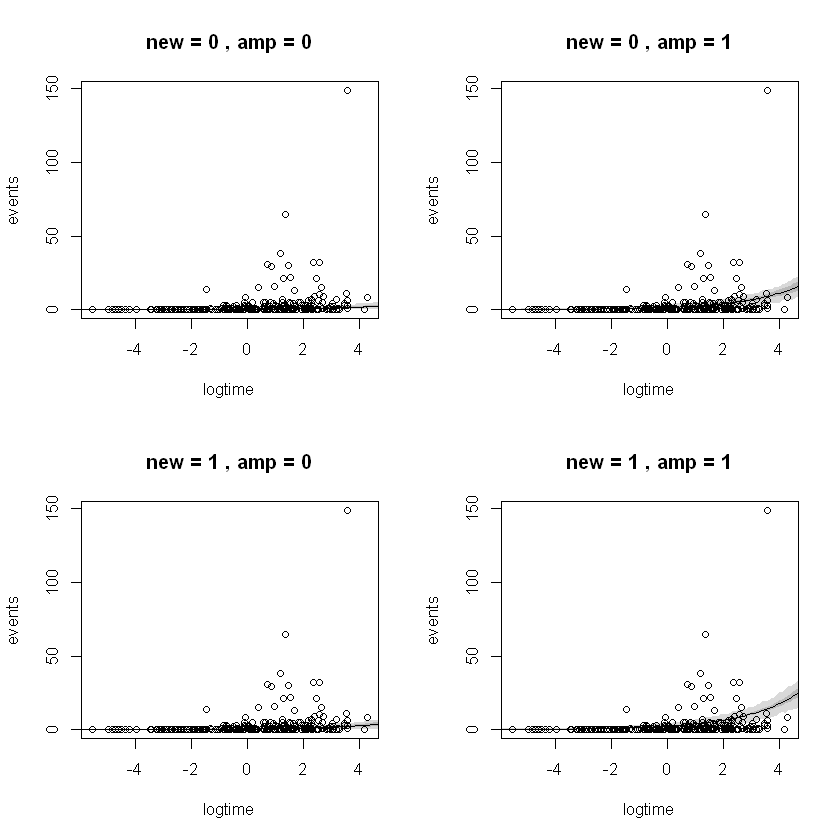

In [61]:
model <- model_amp_new
post <- extract.samples(model)
seq <- seq(from = -6, to = 5, by = 0.1)

# make a plot window with three panels in a single row 
par(mfrow=c(2,2)) # 1 row, 4 columns

for (new in 0:1) for (amp in 0:1) {
plot(events ~ logtime, data = d)
# points(d$logtime[d$new == new && d$amp == amp], d$events[d$new == new && d$amp == amp], col = "red")
title(paste("new =", new, ", amp =", amp))

mu <- link(model, data = list(logtime = seq, new = new, amp = amp))
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)
lines(seq, mu_mean)
shade(mu_HPDI, seq)

sim_data <- sim(model, data = list(logtime = seq, new = new, amp = amp))
sim_HPDI <- apply(sim_data, 2, HPDI, prob = 0.91)
shade(sim_HPDI, seq)
}

We see that the amp and new variables have an enormous impact on the distribution. We expect to see way more event in experiments with amps and next gen detectors than without.